<h3> CYBERCRIME DATA ANALYSIS

<h4>Introduction

<h6> In an era increasingly shaped by AI and Machine Learning, the security of our digital infrastructure is paramount. To effectively protect against future threats, we must learn from the past. This notebook analyzes a synthetic historical dataset of global cyber incidents to identify key trends, patterns, and vulnerabilities. The insights derived from this analysis are intended to inform strategic policy decisions and aid in the data-driven prioritization of security practices.

<h5> 🧾 Data Provenance & Methodology

<h6>This dataset is synthetically generated for educational, research, and analytical purposes. It simulates global cybersecurity threats from 2015 to 2024, using structures and patterns inspired by real-world sources.

📌 Data Construction Approach
The dataset was manually structured to reflect realistic cybersecurity incident reporting practices.
Field values such as "Threat Type", "Attack Vector", "Severity Level", and "Financial Impact" were designed based on commonly reported metrics in the cybersecurity domain.
Temporal trends and cross-category correlations were modeled to reflect plausible developments in global cyber threat behavior over a 10-year period.
Industry targeting, regional exposure, and response metrics were distributed using proportional estimations guided by historical reports and expert-written whitepapers.

📚 Referenced Sources for Structure & Inspiration
The dataset structure and feature logic were inspired by the following publicly available reports and frameworks:

Verizon Data Breach Investigations Report (DBIR)
ENISA Threat Landscape Reports
MITRE ATT&CK Framework
Public whitepapers from vendors such as Symantec, CrowdStrike, and FireEye
CERT advisories and national cybersecurity archives

⚠️ Important Note
This dataset is not based on real-world incident-level data and has not been verified by cybersecurity professionals or firms. It should be treated as a synthetic simulation intended for:

Machine learning prototyping
Data visualization and storytelling
Trend and pattern analysis training
Cybersecurity education and skill-building
If used in academic or professional contexts, please disclose its synthetic nature clearly.

In [51]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<h5> Loading the Dataset as a pandas dataframe

In [2]:
import pandas as pd

filepath = "data\Global_Cybersecurity_Threats_2015-2024.csv"
data = pd.read_csv(filepath)
data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


<h5> Exploring the Structure of the Data

In [3]:
data.shape

(3000, 10)

<h6> The dataset has 3000 rows and 10 columns. This can be understood as it has 3000 incidents and there are 10 features about each incident mentioned.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


<h6> So we can see that this dataset does not have any missing values, which is somewhat expected as it is synthetically generated. Also on looking at the data types the integer columns are fine but columns with object data type might need further inspection. basically i want to make sure that the columns have correct and efficient data types to ensure minimum memory usage and improve performance of the system.

In [5]:
# Count the total number of duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


<h6> Again, we can see that there are no duplicates so this data is clean.

In [6]:
# Generate statistics for numerical columns (count, mean, std, min, max, etc.)
data.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


<h6> While the function currently provides statistics about the year—which may not be immediately relevant and can be set aside for now—other insights are more meaningful. Notably, the average financial loss per case is about $50.49 million, with approximately 504,684 users affected on average, and an average resolution time of 36.47 hours. These figures highlight that cybercrimes are not only real but also extremely impactful, leading to substantial financial damages, widespread user impact, and significant recovery efforts.

In [7]:
# Generate statistics for categorical columns (count, unique, top, freq)
data.describe(include='object')

,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used
count,3000,3000,3000,3000,3000,3000
unique,10,6,7,4,4,5
top,UK,DDoS,IT,Nation-state,Zero-day,Antivirus
freq,321,531,478,794,785,628


In [8]:
# looking at specific features,
data['Attack Type'].value_counts()

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

<h5> EDA

<h6> now i plan to visualize data to better observe information and make inferences.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


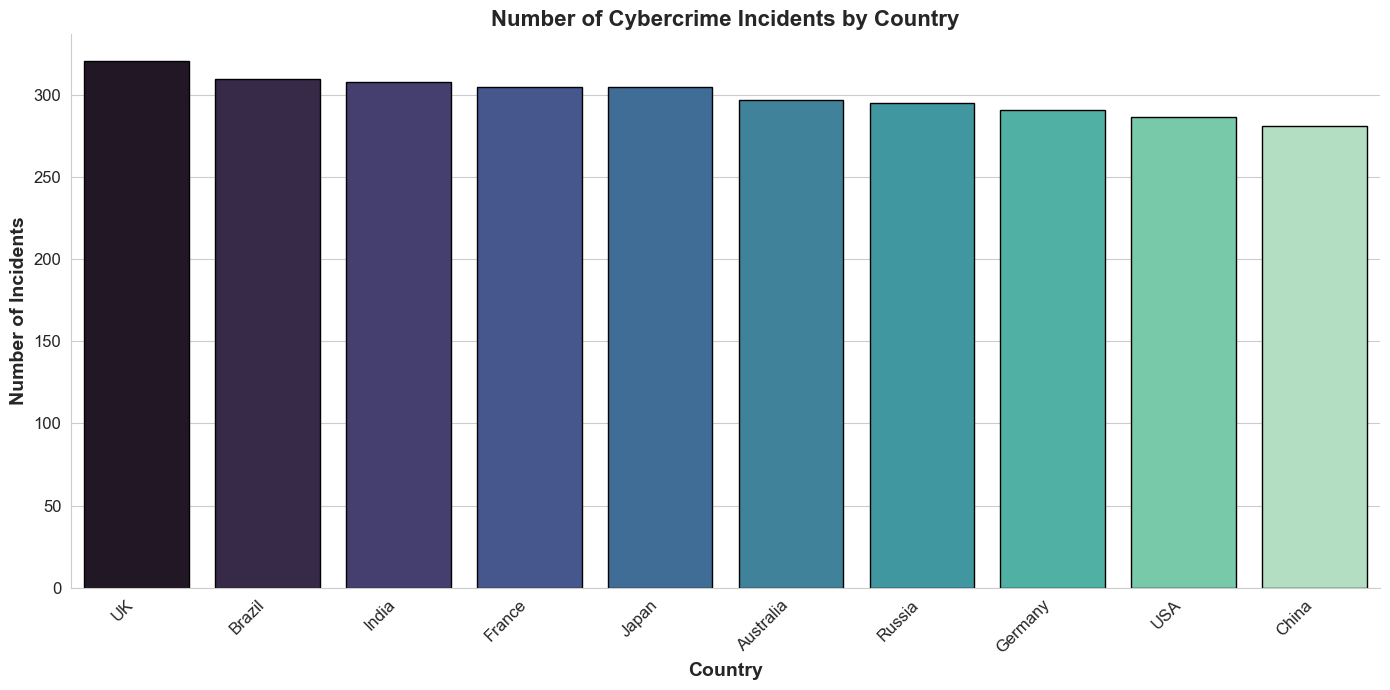

In [11]:
plt.figure(figsize=(14,7))
country_counts = data['Country'].value_counts().sort_values(ascending=False)


sns.set_style("whitegrid")

sns.barplot(
    x=country_counts.index, 
    y=country_counts.values, 
    palette="mako", 
    edgecolor="black", 
    saturation=0.8
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Number of Incidents', fontsize=14, fontweight='bold')
plt.title('Number of Cybercrime Incidents by Country', fontsize=16, fontweight='bold')
plt.tight_layout()


sns.despine()

plt.show()

<h6> not much change in height can be observed from the bar plot. almost all have same number of incidents.  this behaviour can be because of the data being generated synthetically. but still UK has the most number of incidents.

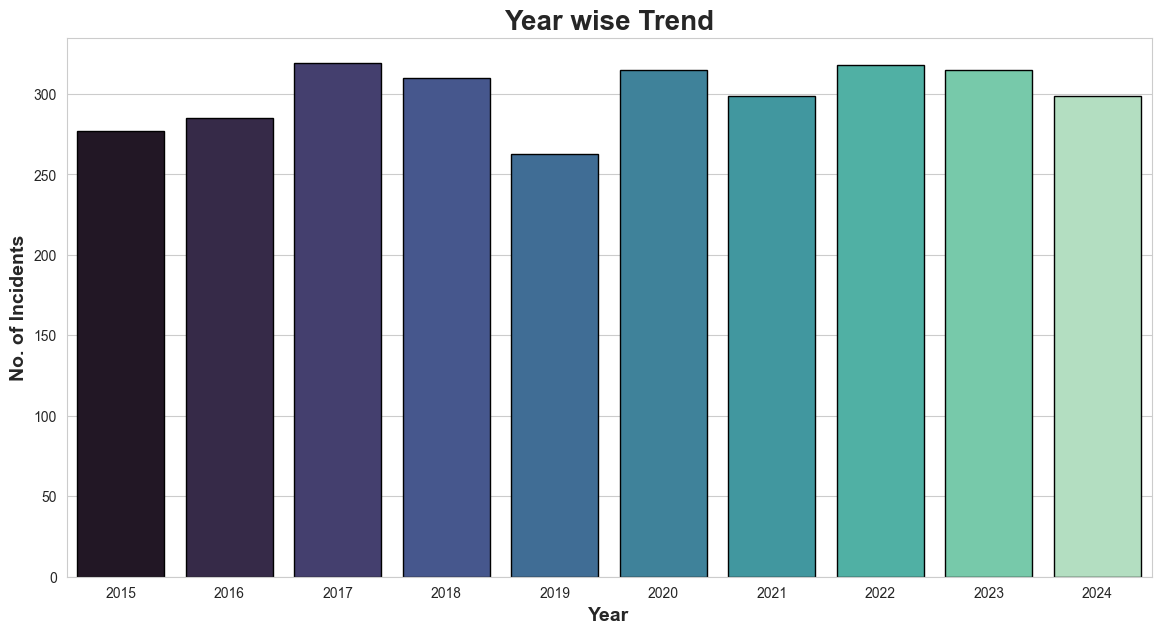

In [20]:
plt.figure(figsize=(14,7))
year_count = data['Year'].value_counts().sort_index(ascending=False)

sns.set_style("whitegrid")
sns.barplot(
    x = year_count.index,
    y = year_count.values,
    palette="mako",
    edgecolor = "black",
    saturation=0.8
)
plt.xlabel(xlabel="Year", fontsize = 14, fontweight = "bold")
plt.ylabel(ylabel="No. of Incidents", fontsize = 14, fontweight = "bold")
plt.title(label="Year wise Trend",fontsize = 20, fontweight = "bold")
plt.show()

In [41]:
data['Financial Loss (in Million $)'].dtype

dtype('float64')

<h6> the number of incidents in 2017 and 2022 are the highest, with 319 and 318 respectively

In [43]:
# Get all columns with integer data type
numeric_cols = data.select_dtypes(include='number').columns
numeric_cols

Index(['Year', 'Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)'],
      dtype='object')

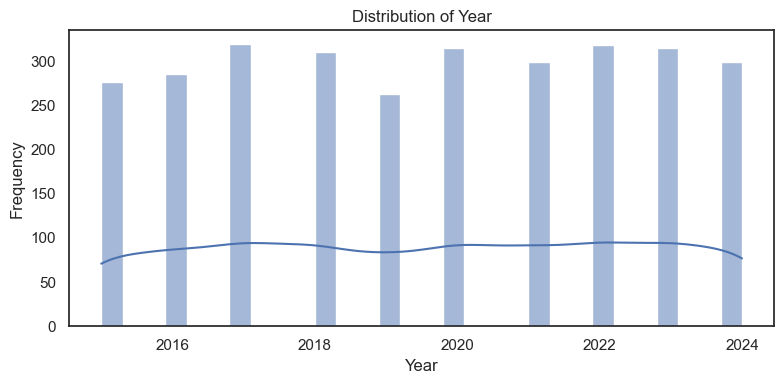

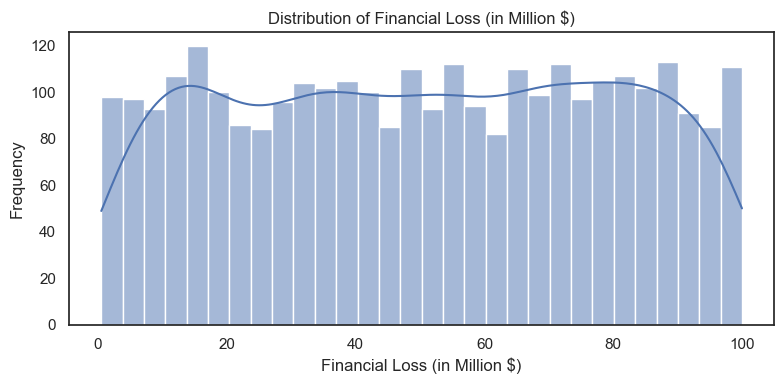

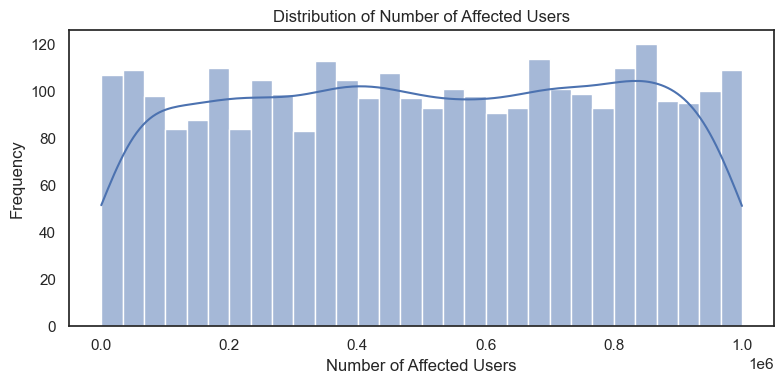

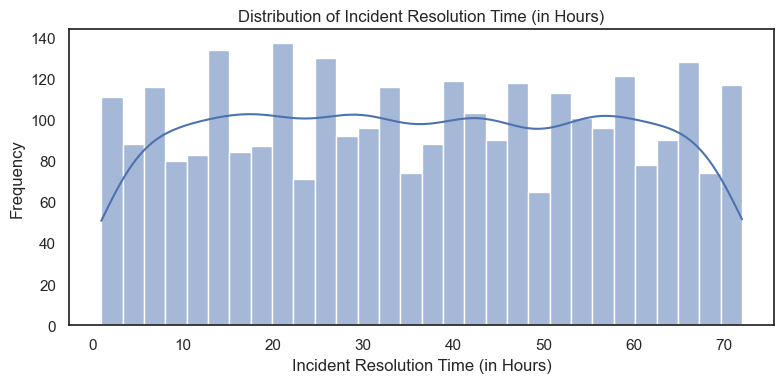

In [44]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<h6> seeing the kde curve in the plots, nothing much can be inferred, though it seems a the data is distributed nearly uniformly, i.e. it is just as likely to affect 5000 users as it is to affect 500000 users, which can be concluded because of synthetic data generation methods.


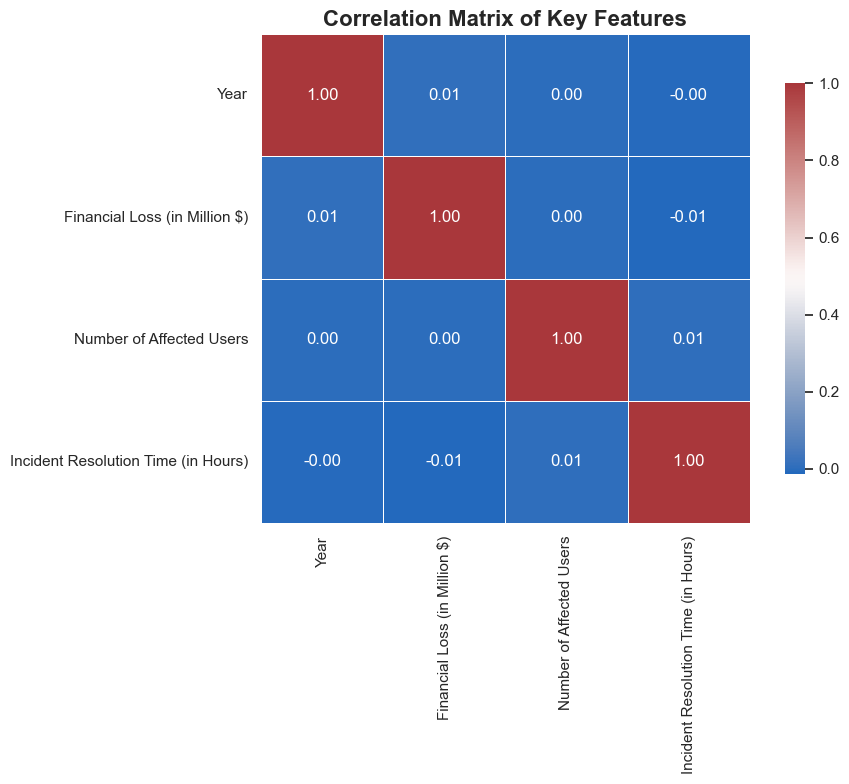

In [45]:
sns.set_theme(style="white")
corr = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr,          
            cmap='vlag',       
            annot=True,        
            fmt=".2f",          
            linewidths=.5,      
            square=True,        
            cbar_kws={"shrink": .8}) 

plt.title("Correlation Matrix of Key Features", fontsize=16, fontweight='bold')
plt.tight_layout() 

<h6>Why:

- To understand relationships between variables.
- To detect multicollinearity before building machine learning models.
- To select features for predictive modeling.
- To identify patterns and insights in data analysis.

When:

- During exploratory data analysis (EDA).
- Before feature selection in machine learning.
- When investigating relationships between business metrics (e.g., sales vs. advertising spend).

Summary:
Correlation helps you understand how variables move together, which is crucial for data analysis, feature engineering, and building reliable models.

<h6> No correlation is observed but in reality we believe there will be some relation between the columns

 - An increase in the Year does not predict any change in Financial Loss.
 - The Number of Affected Users has no bearing on the Incident Resolution Time.
 - The Financial Loss from an incident is not related to the Number of Affected Users.

This also suggests that the data is synthetic. most of the findings suggest synthetic data and it is being talked about a lot. My main goal is to establish a method to analyse the data. in the same project i will also analyse a real world data as well.

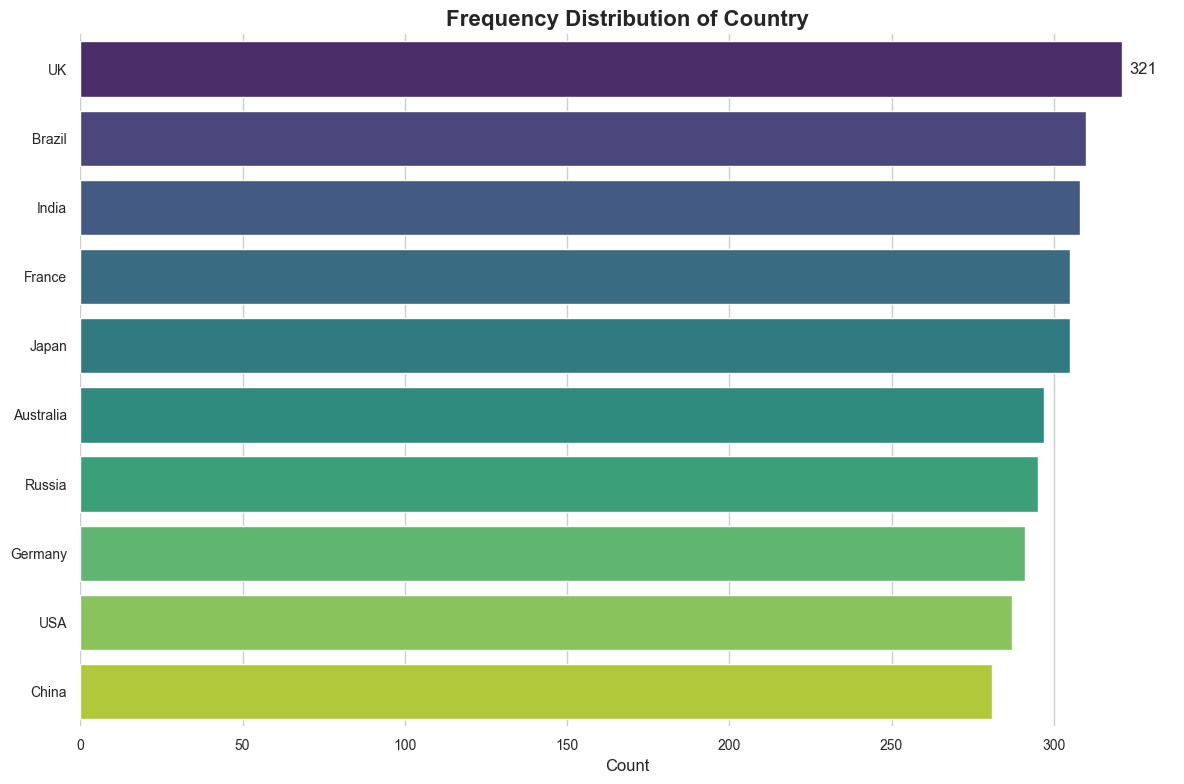

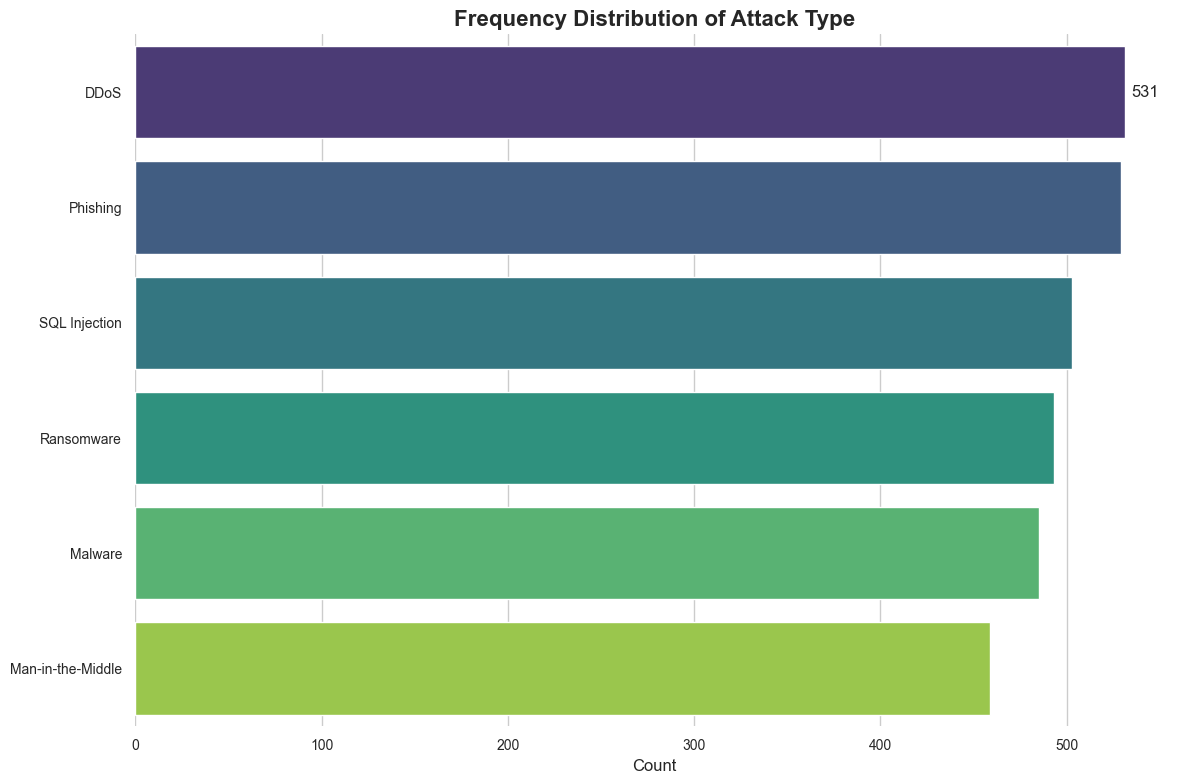

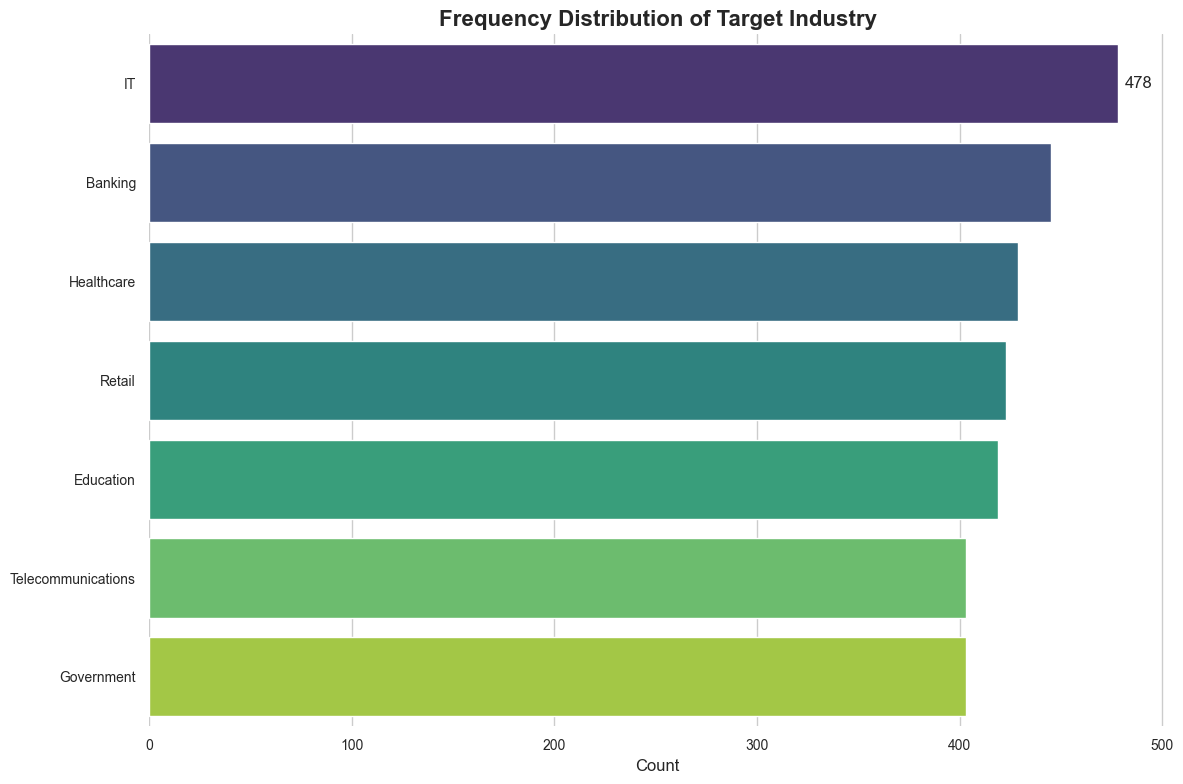

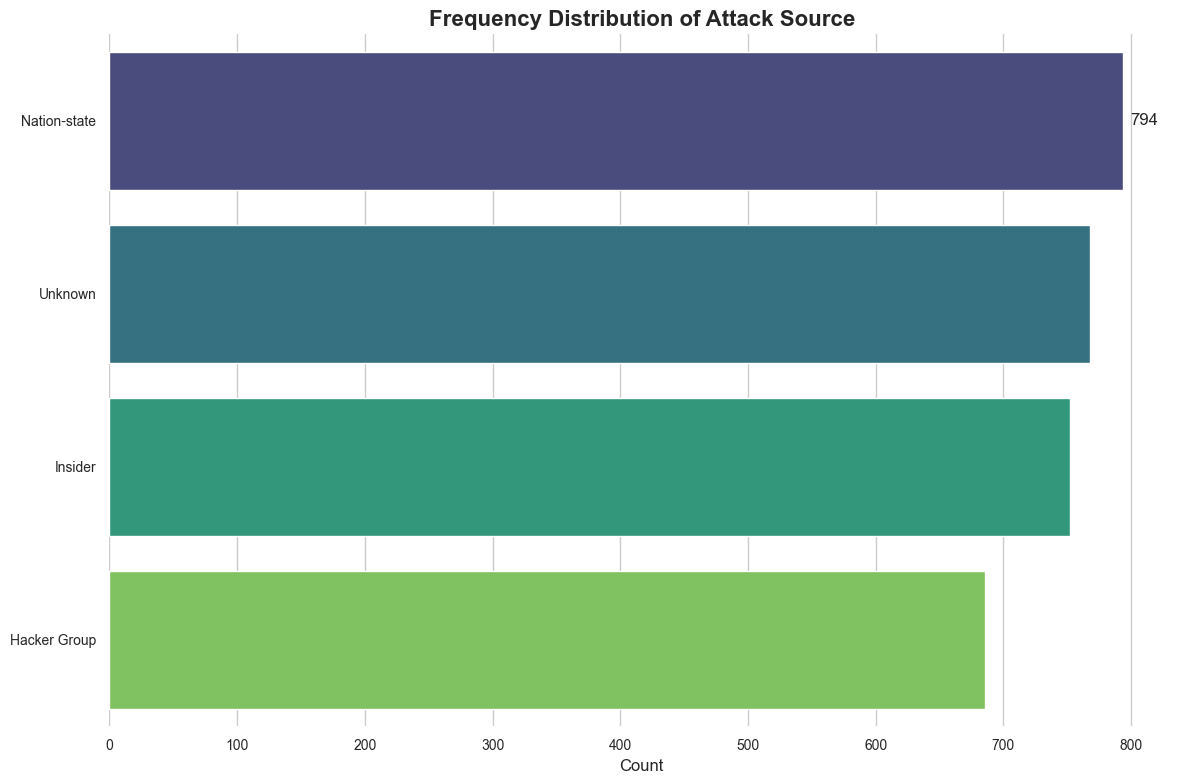

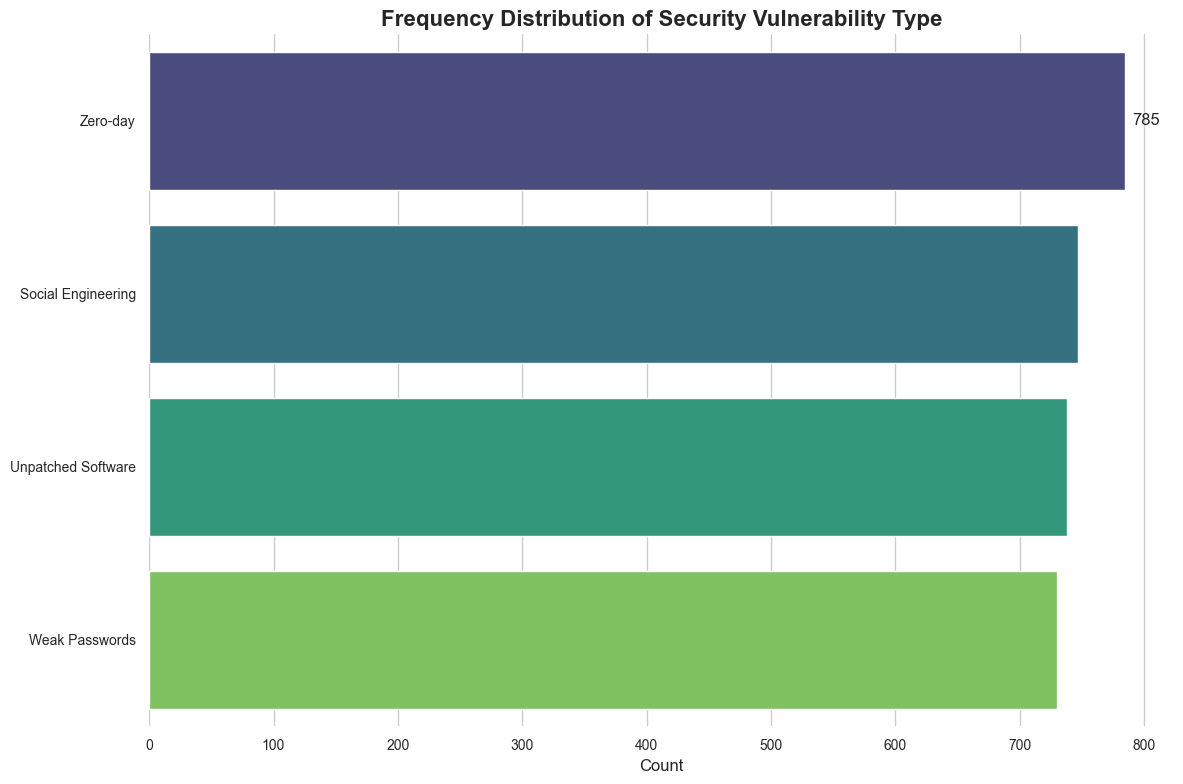

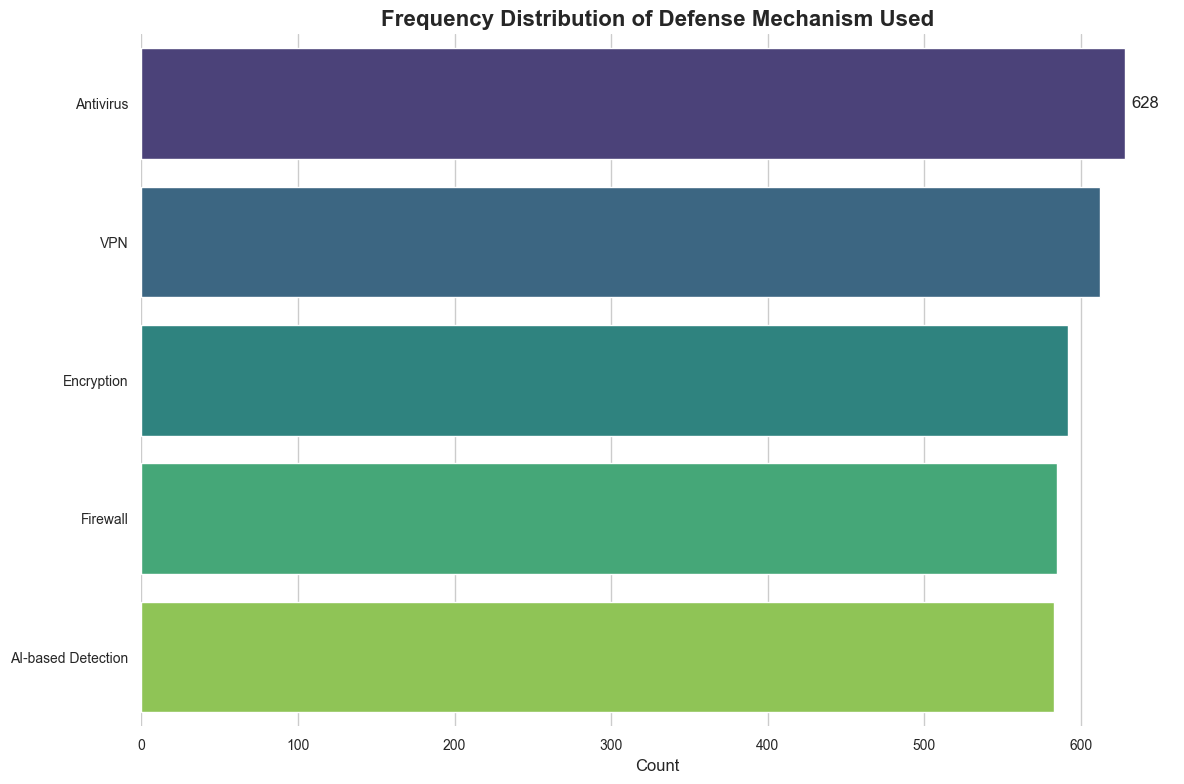

In [49]:
sns.set_theme(style="whitegrid")
categorical_cols = data.select_dtypes(include="object")

for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    
    order = data[col].value_counts().index
    
    ax = sns.countplot(y=col, data=data, order=order, palette="viridis")
    
    ax.bar_label(ax.containers[0], padding=5)
    
    plt.title(f'Frequency Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(None)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

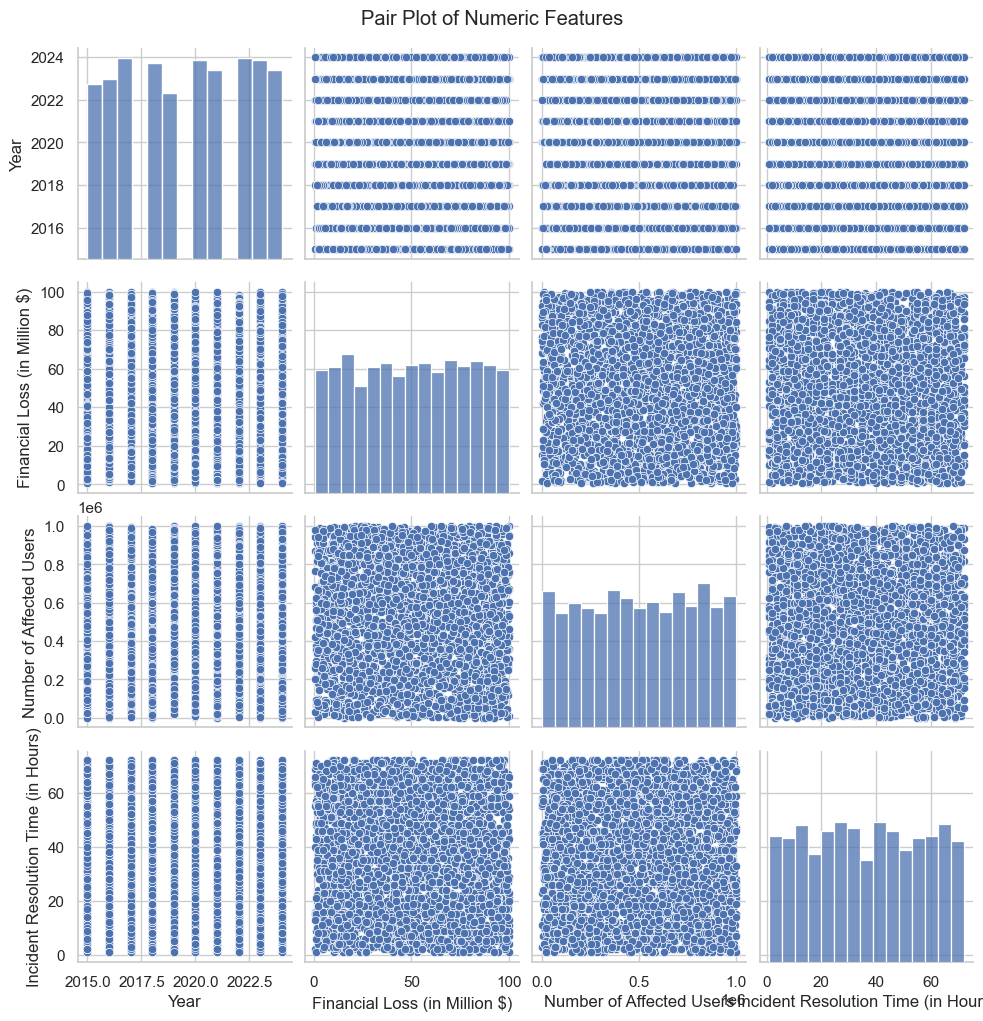

In [50]:
sns.pairplot(data[numeric_cols])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

<h6>In real-world cybercrime data, you would expect more variability, stronger relationships between some features, and more pronounced trends over time or by country.

The features are independent.

<h5> Predictive Modelling

In [53]:

# Define the target variable and predictors
target = 'Financial Loss (in Million $)'
# For predictors, we use a combination of numeric and select categorical features
predictors = ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)', 'Attack Type', 'Target Industry', 'Attack Source']

X = data[predictors]
y = data[target]

# Identify categorical and numerical columns
categorical_features = ['Attack Type', 'Target Industry', 'Attack Source']
numerical_features = ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Create Column Transformer to one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Linear Regression Model Performance:')
print(f'R² Score: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')

Linear Regression Model Performance:
R² Score: -0.005
Mean Squared Error: 812.763
Mean Absolute Error: 24.629


<h5> This poor performance is expected because there is no linear relation between the features to begin with. though the results might be different when real data is used.

In [54]:
print("End of File")

End of File
